In [ ]:
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import preprocessing
import plotly.express as px
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix
import random
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filters = ['FAILURETYPE',
       'H2S_CONCENTRATION',
       'StrokeLength', 'GrossStrokeLength', 'Fillage', 'YesterdaysAverageSPM',
       'max_unguided_dls', 'dls_high_in_hole', 'gas_anchor_length',
       'MAX_INCLINATION',
       'AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING',
       'AVG_DIFFERENTIAL_PRESSURE', 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME',
       'AVG_LIQUID_VOLUME', 'AVG_WATERSG',
        'overall_max_sideload',
       'shallow_max_sideload', 'max_unguided_sideload',
       'CHROME_LENGTH', 'ENDURALLOY_LENGTH', 'POLY_LENGTH', 'NIPPLE_SET_DEPTH',
       'pump_bore']
tags = ['Not Failure', 'Failure']



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Group 3 Inventors Program Project/Data Sets/rodpump_failure.csv')
data['FAILURETYPE'] = data['FAILURETYPE'].replace(np.nan, 'Not Failure')
data['FAILURETYPE'] = data['FAILURETYPE'].replace('Tubing', 'Failure')
data['FAILURETYPE'] = data['FAILURETYPE'].replace('Sucker Rod Pump', 'Failure')
data['FAILURETYPE'] = data['FAILURETYPE'].replace('Rods', 'Failure')
data = data.replace('Other', 0)
min_length = min(list(data['FAILURETYPE'].value_counts(dropna=False)))

In [ ]:
data = data.replace(np.nan, 0)


In [ ]:
filtered_data = data[filters]


In [ ]:
filtered_data

,FAILURETYPE,H2S_CONCENTRATION,StrokeLength,GrossStrokeLength,Fillage,YesterdaysAverageSPM,max_unguided_dls,dls_high_in_hole,gas_anchor_length,MAX_INCLINATION,...,AVG_LIQUID_VOLUME,AVG_WATERSG,overall_max_sideload,shallow_max_sideload,max_unguided_sideload,CHROME_LENGTH,ENDURALLOY_LENGTH,POLY_LENGTH,NIPPLE_SET_DEPTH,pump_bore
0,Failure,0.0,144.000000,108.135619,91.410156,6.000000,1.710783,1.396486,19.27,2.43,...,109.325929,1.04,0.00,0.00,0.00,0.0,0.00,0.0,10024.8,1.5
1,Failure,0.0,168.000000,173.462417,2.500000,0.000000,1.830000,1.650000,17.21,2.30,...,108.557848,0.00,179.44,179.44,179.44,0.0,0.00,0.0,10235.6,1.5
2,Failure,0.0,144.000000,0.000000,0.000000,0.000000,5.470000,5.470000,20.75,2.10,...,56.506804,0.00,105.76,105.76,105.76,0.0,0.00,0.0,10401.9,1.5
3,Failure,0.0,144.199997,0.000000,86.327774,5.800000,1.928766,0.487946,17.25,1.47,...,112.883333,1.04,98.18,47.96,98.18,0.0,0.00,0.0,9557.7,1.75
4,Not Failure,0.0,168.000000,127.228453,61.000000,4.272727,1.871999,3.876364,17.12,4.23,...,93.008849,1.04,266.68,266.68,170.99,0.0,129.39,0.0,9681.7,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,Not Failure,0.0,144.000000,0.000000,0.000000,0.000000,1.259511,1.210066,20.73,1.93,...,98.737291,0.00,96.58,96.58,96.58,0.0,0.00,0.0,9708.4,1.5
2592,Not Failure,0.0,144.000000,0.000000,0.000000,0.000000,1.150000,1.140000,20.75,1.75,...,137.847413,0.00,61.66,61.66,61.66,0.0,0.00,0.0,9904.4,1.5
2593,Failure,0.0,168.039993,129.730177,96.699997,6.600000,1.560000,1.700000,19.80,6.07,...,42.813953,0.00,164.65,164.65,121.77,0.0,65.35,0.0,9014.5,1.75
2594,Failure,0.0,144.000000,0.000000,0.000000,0.000000,1.287232,0.715211,19.25,1.83,...,41.669091,0.00,0.00,0.00,0.00,0.0,0.00,0.0,9532.2,1.5


In [ ]:
labels = []
for i in range(len(filtered_data)):
  labels.append(filtered_data.values[i][0])
labels = np.reshape(np.array(labels), (-1, 1))
oneHotEncoder = OneHotEncoder(sparse=False )
encoded_labels = oneHotEncoder.fit_transform(labels)
encoded_labels

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
for el in encoded_labels:
  print(el)

[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]


In [ ]:
np.array(filtered_data).shape

(2596, 26)

In [ ]:
input_data = []
for i in range(len(filtered_data)):
  input_data.append(filtered_data.values[i][1:])

In [ ]:
input_data = np.array(input_data)
scaler = MinMaxScaler((-1, 1))
input_data = scaler.fit_transform(input_data)

encoded_labels = np.array(encoded_labels)

X_train, X_test, y_train, y_test = train_test_split(input_data, encoded_labels, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2076, 25) (520, 25) (2076, 2) (520, 2)


In [ ]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape=(len(filters) -1)))
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dropout(.5))
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dropout(.5))
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))


  model.add(tf.keras.layers.Dense(len(tags), activation=tf.nn.softmax))

  model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=.001),metrics=['accuracy'])
  return model


In [ ]:
model = create_model()

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=.15)

Epoch 1/50
111/111 [==============================] - 7s 7ms/step - loss: 0.6337 - accuracy: 0.6627 - val_loss: 0.6107 - val_accuracy: 0.6538
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6193 - accuracy: 0.6689 - val_loss: 0.6085 - val_accuracy: 0.7276
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5973 - accuracy: 0.6735 - val_loss: 0.5698 - val_accuracy: 0.7244
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5925 - accuracy: 0.6899 - val_loss: 0.5635 - val_accuracy: 0.7372
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5817 - accuracy: 0.7029 - val_loss: 0.5944 - val_accuracy: 0.7244
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5772 - accuracy: 0.7046 - val_loss: 0.5652 - val_accuracy: 0.7404
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5682 - accuracy: 0.7063 - val_loss: 0.5893 - val_accuracy: 0.6923
Epoch 

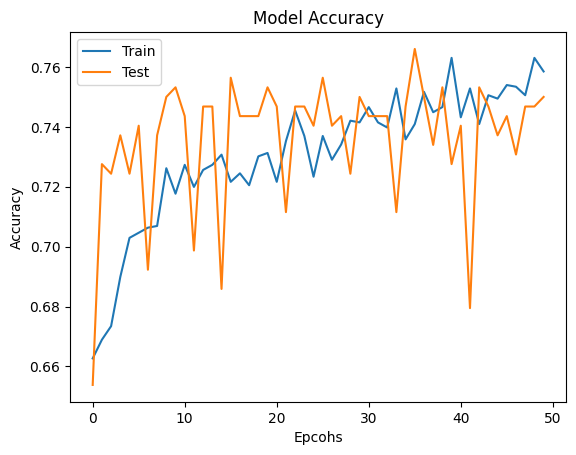

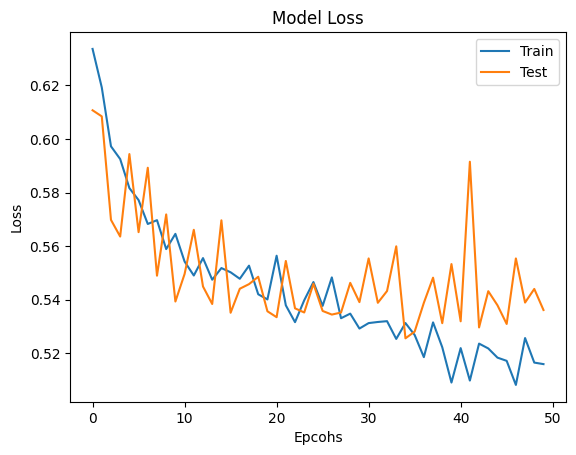

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epcohs')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epcohs')
plt.legend(['Train', 'Test'])
plt.show()

# Uncertainity Score

In [ ]:
input_data = np.array(input_data)

scores= []
for i in range(0, 100):
  X_train, X_test, y_train, y_test = train_test_split(input_data, encoded_labels, test_size=0.2)
  # Init classifier
  test_model = create_model()

  # Fit
  history = test_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=.15)

  y_pred = test_model.predict(X_test)

  count = 0
  for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
      count+=1

  print(count/len(y_pred))
  accuracy = count/len(y_pred)
  scores.append(accuracy)
  print("Accuracy:", accuracy)

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6371 - accuracy: 0.6650 - val_loss: 0.6331 - val_accuracy: 0.6474
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6182 - accuracy: 0.6740 - val_loss: 0.6257 - val_accuracy: 0.6474
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6007 - accuracy: 0.6752 - val_loss: 0.6026 - val_accuracy: 0.7051
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5970 - accuracy: 0.6916 - val_loss: 0.6098 - val_accuracy: 0.6474
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5904 - accuracy: 0.6899 - val_loss: 0.5826 - val_accuracy: 0.6987
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5870 - accuracy: 0.7098 - val_loss: 0.5842 - val_accuracy: 0.6827
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5808 - accuracy: 0.6927 - val_loss: 0.5818 - val_accuracy: 0.6859
Epoch 

Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6385 - accuracy: 0.6542 - val_loss: 0.6238 - val_accuracy: 0.6827
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6316 - accuracy: 0.6587 - val_loss: 0.5991 - val_accuracy: 0.6891
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6048 - accuracy: 0.6650 - val_loss: 0.5561 - val_accuracy: 0.6923
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6069 - accuracy: 0.6791 - val_loss: 0.5690 - val_accuracy: 0.6923
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5873 - accuracy: 0.6978 - val_loss: 0.5233 - val_accuracy: 0.7596
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5861 - accuracy: 0.6978 - val_loss: 0.5633 - val_accuracy: 0.7500
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5824 - accuracy: 0.6893 - val_loss: 0.5549 - val_accuracy: 0.7212
Epoch 

0.7096153846153846
Accuracy: 0.7096153846153846
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6389 - accuracy: 0.6576 - val_loss: 0.6280 - val_accuracy: 0.6571
Epoch 2/50
111/111 [==============================] - 0s 4ms/step - loss: 0.6292 - accuracy: 0.6650 - val_loss: 0.6371 - val_accuracy: 0.6571
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6164 - accuracy: 0.6650 - val_loss: 0.6166 - val_accuracy: 0.6571
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6094 - accuracy: 0.6706 - val_loss: 0.5985 - val_accuracy: 0.7115
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5961 - accuracy: 0.6865 - val_loss: 0.5839 - val_accuracy: 0.7115
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5869 - accuracy: 0.7069 - val_loss: 0.6262 - val_accuracy: 0.6635
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5759 - accuracy: 0.7149 

Epoch 1/50
111/111 [==============================] - 4s 6ms/step - loss: 0.6288 - accuracy: 0.6667 - val_loss: 0.6074 - val_accuracy: 0.6603
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6301 - accuracy: 0.6655 - val_loss: 0.6181 - val_accuracy: 0.6603
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6059 - accuracy: 0.6723 - val_loss: 0.5939 - val_accuracy: 0.6667
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5916 - accuracy: 0.6967 - val_loss: 0.5913 - val_accuracy: 0.6699
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5900 - accuracy: 0.7001 - val_loss: 0.5883 - val_accuracy: 0.6859
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5763 - accuracy: 0.6973 - val_loss: 0.5659 - val_accuracy: 0.7179
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5816 - accuracy: 0.6973 - val_loss: 0.5536 - val_accuracy: 0.7340
Epoch 

Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6298 - accuracy: 0.6548 - val_loss: 0.6380 - val_accuracy: 0.6667
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6235 - accuracy: 0.6638 - val_loss: 0.6262 - val_accuracy: 0.7212
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6088 - accuracy: 0.6587 - val_loss: 0.5812 - val_accuracy: 0.7276
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5967 - accuracy: 0.6865 - val_loss: 0.5730 - val_accuracy: 0.7404
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5750 - accuracy: 0.7080 - val_loss: 0.6420 - val_accuracy: 0.6250
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5785 - accuracy: 0.7103 - val_loss: 0.5618 - val_accuracy: 0.7340
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5668 - accuracy: 0.7273 - val_loss: 0.5699 - val_accuracy: 0.7244
Epoch 

0.7192307692307692
Accuracy: 0.7192307692307692
Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6396 - accuracy: 0.6610 - val_loss: 0.6217 - val_accuracy: 0.6731
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6178 - accuracy: 0.6684 - val_loss: 0.6022 - val_accuracy: 0.6731
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6121 - accuracy: 0.6684 - val_loss: 0.5895 - val_accuracy: 0.6731
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6023 - accuracy: 0.6689 - val_loss: 0.5852 - val_accuracy: 0.7019
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5765 - accuracy: 0.7046 - val_loss: 0.5663 - val_accuracy: 0.7147
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5682 - accuracy: 0.7143 - val_loss: 0.5617 - val_accuracy: 0.7212
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5729 - accuracy: 0.7171 

0.7057692307692308
Accuracy: 0.7057692307692308
Epoch 1/50
111/111 [==============================] - 3s 9ms/step - loss: 0.6438 - accuracy: 0.6559 - val_loss: 0.6313 - val_accuracy: 0.6731
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6339 - accuracy: 0.6610 - val_loss: 0.6223 - val_accuracy: 0.6731
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6144 - accuracy: 0.6638 - val_loss: 0.6125 - val_accuracy: 0.6731
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6003 - accuracy: 0.6723 - val_loss: 0.6290 - val_accuracy: 0.6667
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6122 - accuracy: 0.6655 - val_loss: 0.6141 - val_accuracy: 0.7019
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5796 - accuracy: 0.6820 - val_loss: 0.5893 - val_accuracy: 0.6987
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5787 - accuracy: 0.6910 

0.7326923076923076
Accuracy: 0.7326923076923076
Epoch 1/50
111/111 [==============================] - 4s 9ms/step - loss: 0.6379 - accuracy: 0.6593 - val_loss: 0.5986 - val_accuracy: 0.6731
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6193 - accuracy: 0.6616 - val_loss: 0.5793 - val_accuracy: 0.6763
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6059 - accuracy: 0.6723 - val_loss: 0.5855 - val_accuracy: 0.6667
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5934 - accuracy: 0.6933 - val_loss: 0.5920 - val_accuracy: 0.7372
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5874 - accuracy: 0.7109 - val_loss: 0.5673 - val_accuracy: 0.7179
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5742 - accuracy: 0.7018 - val_loss: 0.5490 - val_accuracy: 0.7500
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5763 - accuracy: 0.7080 

0.6942307692307692
Accuracy: 0.6942307692307692
Epoch 1/50
111/111 [==============================] - 4s 6ms/step - loss: 0.6364 - accuracy: 0.6604 - val_loss: 0.6085 - val_accuracy: 0.6667
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6300 - accuracy: 0.6599 - val_loss: 0.5930 - val_accuracy: 0.6667
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6081 - accuracy: 0.6610 - val_loss: 0.5764 - val_accuracy: 0.6763
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5953 - accuracy: 0.6808 - val_loss: 0.5873 - val_accuracy: 0.6955
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5897 - accuracy: 0.7046 - val_loss: 0.5661 - val_accuracy: 0.7179
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5959 - accuracy: 0.6712 - val_loss: 0.5837 - val_accuracy: 0.7051
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5765 - accuracy: 0.7086 

0.725
Accuracy: 0.725
Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6372 - accuracy: 0.6616 - val_loss: 0.6233 - val_accuracy: 0.6603
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6242 - accuracy: 0.6695 - val_loss: 0.6232 - val_accuracy: 0.6603
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6073 - accuracy: 0.6695 - val_loss: 0.5865 - val_accuracy: 0.6603
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6007 - accuracy: 0.6814 - val_loss: 0.5864 - val_accuracy: 0.6763
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5813 - accuracy: 0.7035 - val_loss: 0.5774 - val_accuracy: 0.7083
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5824 - accuracy: 0.6984 - val_loss: 0.5946 - val_accuracy: 0.6699
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5634 - accuracy: 0.7205 - val_loss: 0.5744 - val_a

0.7192307692307692
Accuracy: 0.7192307692307692
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6352 - accuracy: 0.6706 - val_loss: 0.6359 - val_accuracy: 0.6667
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6106 - accuracy: 0.6718 - val_loss: 0.6139 - val_accuracy: 0.6667
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5951 - accuracy: 0.6740 - val_loss: 0.6489 - val_accuracy: 0.5449
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5989 - accuracy: 0.6808 - val_loss: 0.6027 - val_accuracy: 0.6827
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5847 - accuracy: 0.7046 - val_loss: 0.5916 - val_accuracy: 0.6955
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5675 - accuracy: 0.7200 - val_loss: 0.6195 - val_accuracy: 0.6987
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5610 - accuracy: 0.7245 

0.7134615384615385
Accuracy: 0.7134615384615385
Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6304 - accuracy: 0.6735 - val_loss: 0.6510 - val_accuracy: 0.6282
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6274 - accuracy: 0.6723 - val_loss: 0.6441 - val_accuracy: 0.6282
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6042 - accuracy: 0.6752 - val_loss: 0.6212 - val_accuracy: 0.6442
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5994 - accuracy: 0.6990 - val_loss: 0.6233 - val_accuracy: 0.6506
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5840 - accuracy: 0.7109 - val_loss: 0.6249 - val_accuracy: 0.6571
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5731 - accuracy: 0.7166 - val_loss: 0.5982 - val_accuracy: 0.6827
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5696 - accuracy: 0.7132 

0.7115384615384616
Accuracy: 0.7115384615384616
Epoch 1/50
111/111 [==============================] - 3s 9ms/step - loss: 0.6481 - accuracy: 0.6451 - val_loss: 0.5815 - val_accuracy: 0.7244
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6418 - accuracy: 0.6457 - val_loss: 0.5586 - val_accuracy: 0.7244
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6198 - accuracy: 0.6593 - val_loss: 0.5327 - val_accuracy: 0.7436
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6097 - accuracy: 0.6797 - val_loss: 0.5411 - val_accuracy: 0.7468
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5996 - accuracy: 0.6933 - val_loss: 0.5253 - val_accuracy: 0.7436
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5884 - accuracy: 0.7001 - val_loss: 0.5965 - val_accuracy: 0.6571
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5840 - accuracy: 0.7063 

0.7192307692307692
Accuracy: 0.7192307692307692
Epoch 1/50
111/111 [==============================] - 4s 9ms/step - loss: 0.6297 - accuracy: 0.6633 - val_loss: 0.6345 - val_accuracy: 0.6571
Epoch 2/50
111/111 [==============================] - 1s 8ms/step - loss: 0.6316 - accuracy: 0.6633 - val_loss: 0.6087 - val_accuracy: 0.6571
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6105 - accuracy: 0.6633 - val_loss: 0.5938 - val_accuracy: 0.6731
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6049 - accuracy: 0.6746 - val_loss: 0.6019 - val_accuracy: 0.6731
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5965 - accuracy: 0.6893 - val_loss: 0.5765 - val_accuracy: 0.6763
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5866 - accuracy: 0.7086 - val_loss: 0.5658 - val_accuracy: 0.7051
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5764 - accuracy: 0.7132 

0.7
Accuracy: 0.7
Epoch 1/50
111/111 [==============================] - 4s 9ms/step - loss: 0.6347 - accuracy: 0.6604 - val_loss: 0.6364 - val_accuracy: 0.6763
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6155 - accuracy: 0.6616 - val_loss: 0.6151 - val_accuracy: 0.6763
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5974 - accuracy: 0.6797 - val_loss: 0.5800 - val_accuracy: 0.7147
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5869 - accuracy: 0.6995 - val_loss: 0.5780 - val_accuracy: 0.7212
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5725 - accuracy: 0.7205 - val_loss: 0.5792 - val_accuracy: 0.6923
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5659 - accuracy: 0.7160 - val_loss: 0.5756 - val_accuracy: 0.7212
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5553 - accuracy: 0.7183 - val_loss: 0.5725 - val_accur

0.7230769230769231
Accuracy: 0.7230769230769231
Epoch 1/50
111/111 [==============================] - 4s 7ms/step - loss: 0.6367 - accuracy: 0.6621 - val_loss: 0.5822 - val_accuracy: 0.7179
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6219 - accuracy: 0.6621 - val_loss: 0.5814 - val_accuracy: 0.7179
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5975 - accuracy: 0.6718 - val_loss: 0.5532 - val_accuracy: 0.7340
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5748 - accuracy: 0.7063 - val_loss: 0.5556 - val_accuracy: 0.7340
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5676 - accuracy: 0.7166 - val_loss: 0.5551 - val_accuracy: 0.7115
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5685 - accuracy: 0.7177 - val_loss: 0.5372 - val_accuracy: 0.7404
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5634 - accuracy: 0.7188 

0.6884615384615385
Accuracy: 0.6884615384615385
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6403 - accuracy: 0.6451 - val_loss: 0.6305 - val_accuracy: 0.6763
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6064 - accuracy: 0.6706 - val_loss: 0.6051 - val_accuracy: 0.6891
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5890 - accuracy: 0.7007 - val_loss: 0.5986 - val_accuracy: 0.6955
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5650 - accuracy: 0.7285 - val_loss: 0.6171 - val_accuracy: 0.6506
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5764 - accuracy: 0.7188 - val_loss: 0.5898 - val_accuracy: 0.7019
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5734 - accuracy: 0.7115 - val_loss: 0.6205 - val_accuracy: 0.6154
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5641 - accuracy: 0.7262 

Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6272 - accuracy: 0.6689 - val_loss: 0.6534 - val_accuracy: 0.6346
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6157 - accuracy: 0.6723 - val_loss: 0.6205 - val_accuracy: 0.6346
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6037 - accuracy: 0.6723 - val_loss: 0.6223 - val_accuracy: 0.6346
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5947 - accuracy: 0.6837 - val_loss: 0.5980 - val_accuracy: 0.6795
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5703 - accuracy: 0.7007 - val_loss: 0.5853 - val_accuracy: 0.7019
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5872 - accuracy: 0.6888 - val_loss: 0.6091 - val_accuracy: 0.6571
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5634 - accuracy: 0.7234 - val_loss: 0.5822 - val_accuracy: 0.6891
Epoch 

0.7
Accuracy: 0.7
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6457 - accuracy: 0.6576 - val_loss: 0.6334 - val_accuracy: 0.6410
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6246 - accuracy: 0.6582 - val_loss: 0.6174 - val_accuracy: 0.6410
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6102 - accuracy: 0.6763 - val_loss: 0.6125 - val_accuracy: 0.6603
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5958 - accuracy: 0.6763 - val_loss: 0.5815 - val_accuracy: 0.6827
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5838 - accuracy: 0.7052 - val_loss: 0.6199 - val_accuracy: 0.6571
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5711 - accuracy: 0.7063 - val_loss: 0.5754 - val_accuracy: 0.6987
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5735 - accuracy: 0.7239 - val_loss: 0.5910 - val_accur

0.7192307692307692
Accuracy: 0.7192307692307692
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6396 - accuracy: 0.6616 - val_loss: 0.6229 - val_accuracy: 0.6538
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6228 - accuracy: 0.6627 - val_loss: 0.6133 - val_accuracy: 0.6538
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6140 - accuracy: 0.6667 - val_loss: 0.6125 - val_accuracy: 0.6538
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6059 - accuracy: 0.6712 - val_loss: 0.5852 - val_accuracy: 0.7115
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5912 - accuracy: 0.6990 - val_loss: 0.6001 - val_accuracy: 0.7051
Epoch 6/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5743 - accuracy: 0.7046 - val_loss: 0.5488 - val_accuracy: 0.7244
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5793 - accuracy: 0.6950 

0.7288461538461538
Accuracy: 0.7288461538461538
Epoch 1/50
111/111 [==============================] - 3s 10ms/step - loss: 0.6362 - accuracy: 0.6638 - val_loss: 0.6338 - val_accuracy: 0.6346
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6091 - accuracy: 0.6695 - val_loss: 0.6198 - val_accuracy: 0.6378
Epoch 3/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5956 - accuracy: 0.6888 - val_loss: 0.5861 - val_accuracy: 0.7083
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5928 - accuracy: 0.6910 - val_loss: 0.5779 - val_accuracy: 0.7115
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5867 - accuracy: 0.7018 - val_loss: 0.5736 - val_accuracy: 0.7276
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5652 - accuracy: 0.7268 - val_loss: 0.5599 - val_accuracy: 0.7244
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5861 - accuracy: 0.7092

0.6807692307692308
Accuracy: 0.6807692307692308
Epoch 1/50
111/111 [==============================] - 4s 9ms/step - loss: 0.6400 - accuracy: 0.6604 - val_loss: 0.5943 - val_accuracy: 0.6955
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6224 - accuracy: 0.6650 - val_loss: 0.5877 - val_accuracy: 0.6955
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6175 - accuracy: 0.6706 - val_loss: 0.5990 - val_accuracy: 0.7244
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6068 - accuracy: 0.6973 - val_loss: 0.5642 - val_accuracy: 0.6987
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5944 - accuracy: 0.6944 - val_loss: 0.5534 - val_accuracy: 0.7468
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5835 - accuracy: 0.7109 - val_loss: 0.5123 - val_accuracy: 0.7692
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5878 - accuracy: 0.7075 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6340 - accuracy: 0.6689 - val_loss: 0.5829 - val_accuracy: 0.7083
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6178 - accuracy: 0.6712 - val_loss: 0.5722 - val_accuracy: 0.7083
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6100 - accuracy: 0.6650 - val_loss: 0.5925 - val_accuracy: 0.7051
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5895 - accuracy: 0.6905 - val_loss: 0.5713 - val_accuracy: 0.6603
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5894 - accuracy: 0.6939 - val_loss: 0.5884 - val_accuracy: 0.6795
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5694 - accuracy: 0.7092 - val_loss: 0.5739 - val_accuracy: 0.6538
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5776 - accuracy: 0.7143 - val_loss: 0.5472 - val_accuracy: 0.7468
Epoch 

0.6961538461538461
Accuracy: 0.6961538461538461
Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6393 - accuracy: 0.6576 - val_loss: 0.6271 - val_accuracy: 0.6635
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6125 - accuracy: 0.6638 - val_loss: 0.5885 - val_accuracy: 0.6667
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5980 - accuracy: 0.6899 - val_loss: 0.5818 - val_accuracy: 0.6763
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5775 - accuracy: 0.7103 - val_loss: 0.5934 - val_accuracy: 0.7051
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5742 - accuracy: 0.6995 - val_loss: 0.5739 - val_accuracy: 0.7179
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5664 - accuracy: 0.7177 - val_loss: 0.5738 - val_accuracy: 0.6859
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5638 - accuracy: 0.7307 

Epoch 1/50
111/111 [==============================] - 4s 10ms/step - loss: 0.6309 - accuracy: 0.6701 - val_loss: 0.6067 - val_accuracy: 0.6827
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6199 - accuracy: 0.6718 - val_loss: 0.6039 - val_accuracy: 0.6827
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6019 - accuracy: 0.6808 - val_loss: 0.6346 - val_accuracy: 0.6506
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5992 - accuracy: 0.6774 - val_loss: 0.5670 - val_accuracy: 0.7500
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5892 - accuracy: 0.6780 - val_loss: 0.6056 - val_accuracy: 0.7019
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5764 - accuracy: 0.7046 - val_loss: 0.5799 - val_accuracy: 0.6827
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5865 - accuracy: 0.7171 - val_loss: 0.5589 - val_accuracy: 0.7468
Epoch

0.7153846153846154
Accuracy: 0.7153846153846154
Epoch 1/50
111/111 [==============================] - 4s 7ms/step - loss: 0.6367 - accuracy: 0.6701 - val_loss: 0.6444 - val_accuracy: 0.6346
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6258 - accuracy: 0.6701 - val_loss: 0.6384 - val_accuracy: 0.6346
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6268 - accuracy: 0.6695 - val_loss: 0.6257 - val_accuracy: 0.6346
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6019 - accuracy: 0.6689 - val_loss: 0.5987 - val_accuracy: 0.6410
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5937 - accuracy: 0.6820 - val_loss: 0.5855 - val_accuracy: 0.7019
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5904 - accuracy: 0.6995 - val_loss: 0.5819 - val_accuracy: 0.7083
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5747 - accuracy: 0.7166 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6387 - accuracy: 0.6570 - val_loss: 0.6556 - val_accuracy: 0.6538
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6270 - accuracy: 0.6576 - val_loss: 0.6126 - val_accuracy: 0.6538
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6081 - accuracy: 0.6604 - val_loss: 0.5974 - val_accuracy: 0.6538
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6016 - accuracy: 0.6763 - val_loss: 0.5949 - val_accuracy: 0.6667
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5951 - accuracy: 0.7007 - val_loss: 0.5897 - val_accuracy: 0.6987
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5804 - accuracy: 0.7245 - val_loss: 0.5740 - val_accuracy: 0.7115
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5682 - accuracy: 0.7166 - val_loss: 0.5786 - val_accuracy: 0.7179
Epoch 

0.7096153846153846
Accuracy: 0.7096153846153846
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6436 - accuracy: 0.6525 - val_loss: 0.6486 - val_accuracy: 0.6955
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6239 - accuracy: 0.6604 - val_loss: 0.6094 - val_accuracy: 0.6955
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6119 - accuracy: 0.6661 - val_loss: 0.5921 - val_accuracy: 0.7019
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5962 - accuracy: 0.6803 - val_loss: 0.5703 - val_accuracy: 0.7147
Epoch 5/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5815 - accuracy: 0.6967 - val_loss: 0.6031 - val_accuracy: 0.6314
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5685 - accuracy: 0.7041 - val_loss: 0.5761 - val_accuracy: 0.7019
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5623 - accuracy: 0.7177 

0.7096153846153846
Accuracy: 0.7096153846153846
Epoch 1/50
111/111 [==============================] - 3s 8ms/step - loss: 0.6332 - accuracy: 0.6644 - val_loss: 0.6463 - val_accuracy: 0.6346
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6255 - accuracy: 0.6650 - val_loss: 0.6208 - val_accuracy: 0.6571
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6023 - accuracy: 0.6825 - val_loss: 0.6260 - val_accuracy: 0.6346
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5953 - accuracy: 0.6842 - val_loss: 0.6129 - val_accuracy: 0.6635
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5880 - accuracy: 0.7058 - val_loss: 0.6116 - val_accuracy: 0.6859
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5713 - accuracy: 0.7194 - val_loss: 0.6024 - val_accuracy: 0.6859
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5744 - accuracy: 0.7029 

0.7326923076923076
Accuracy: 0.7326923076923076
Epoch 1/50
111/111 [==============================] - 3s 9ms/step - loss: 0.6429 - accuracy: 0.6457 - val_loss: 0.6078 - val_accuracy: 0.6795
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6268 - accuracy: 0.6548 - val_loss: 0.6050 - val_accuracy: 0.6859
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6071 - accuracy: 0.6689 - val_loss: 0.5781 - val_accuracy: 0.7019
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5878 - accuracy: 0.7029 - val_loss: 0.5975 - val_accuracy: 0.7051
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5800 - accuracy: 0.7046 - val_loss: 0.5645 - val_accuracy: 0.7083
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5770 - accuracy: 0.7137 - val_loss: 0.6414 - val_accuracy: 0.6090
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5804 - accuracy: 0.7143 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6410 - accuracy: 0.6616 - val_loss: 0.6322 - val_accuracy: 0.6410
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6236 - accuracy: 0.6667 - val_loss: 0.6136 - val_accuracy: 0.6410
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6152 - accuracy: 0.6655 - val_loss: 0.6143 - val_accuracy: 0.6410
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6061 - accuracy: 0.6791 - val_loss: 0.6473 - val_accuracy: 0.6122
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5981 - accuracy: 0.6718 - val_loss: 0.5913 - val_accuracy: 0.6763
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5895 - accuracy: 0.6990 - val_loss: 0.5733 - val_accuracy: 0.7115
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5827 - accuracy: 0.7103 - val_loss: 0.6106 - val_accuracy: 0.6763
Epoch 

Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6373 - accuracy: 0.6599 - val_loss: 0.6120 - val_accuracy: 0.6635
Epoch 2/50
111/111 [==============================] - 1s 8ms/step - loss: 0.6277 - accuracy: 0.6638 - val_loss: 0.6106 - val_accuracy: 0.6635
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6042 - accuracy: 0.6791 - val_loss: 0.5842 - val_accuracy: 0.6827
Epoch 4/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5982 - accuracy: 0.6865 - val_loss: 0.5963 - val_accuracy: 0.7115
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5865 - accuracy: 0.6916 - val_loss: 0.5832 - val_accuracy: 0.7019
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5795 - accuracy: 0.7035 - val_loss: 0.5692 - val_accuracy: 0.7212
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5753 - accuracy: 0.7098 - val_loss: 0.5849 - val_accuracy: 0.7051
Epoch 

0.7211538461538461
Accuracy: 0.7211538461538461
Epoch 1/50
111/111 [==============================] - 3s 10ms/step - loss: 0.6264 - accuracy: 0.6627 - val_loss: 0.6429 - val_accuracy: 0.6442
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6167 - accuracy: 0.6763 - val_loss: 0.6309 - val_accuracy: 0.6442
Epoch 3/50
111/111 [==============================] - 1s 8ms/step - loss: 0.6036 - accuracy: 0.6763 - val_loss: 0.6070 - val_accuracy: 0.6442
Epoch 4/50
111/111 [==============================] - 1s 8ms/step - loss: 0.6001 - accuracy: 0.6712 - val_loss: 0.6009 - val_accuracy: 0.6442
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6005 - accuracy: 0.6842 - val_loss: 0.5995 - val_accuracy: 0.6699
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5800 - accuracy: 0.7001 - val_loss: 0.5953 - val_accuracy: 0.6891
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5838 - accuracy: 0.7171

0.7519230769230769
Accuracy: 0.7519230769230769
Epoch 1/50
111/111 [==============================] - 3s 8ms/step - loss: 0.6456 - accuracy: 0.6570 - val_loss: 0.6259 - val_accuracy: 0.6699
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6303 - accuracy: 0.6633 - val_loss: 0.6271 - val_accuracy: 0.6699
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6160 - accuracy: 0.6644 - val_loss: 0.5989 - val_accuracy: 0.6763
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6099 - accuracy: 0.6922 - val_loss: 0.5931 - val_accuracy: 0.6763
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5980 - accuracy: 0.6916 - val_loss: 0.5757 - val_accuracy: 0.7051
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5899 - accuracy: 0.6933 - val_loss: 0.5688 - val_accuracy: 0.7051
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5806 - accuracy: 0.7069 

Epoch 1/50
111/111 [==============================] - 4s 12ms/step - loss: 0.6355 - accuracy: 0.6582 - val_loss: 0.6141 - val_accuracy: 0.6635
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6188 - accuracy: 0.6672 - val_loss: 0.6056 - val_accuracy: 0.6635
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6063 - accuracy: 0.6661 - val_loss: 0.5983 - val_accuracy: 0.6891
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6053 - accuracy: 0.6746 - val_loss: 0.5803 - val_accuracy: 0.6987
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5962 - accuracy: 0.6780 - val_loss: 0.5707 - val_accuracy: 0.7468
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5817 - accuracy: 0.7024 - val_loss: 0.5452 - val_accuracy: 0.7372
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5660 - accuracy: 0.7109 - val_loss: 0.5298 - val_accuracy: 0.7564
Epoch

0.7211538461538461
Accuracy: 0.7211538461538461
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6428 - accuracy: 0.6417 - val_loss: 0.5988 - val_accuracy: 0.6891
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6269 - accuracy: 0.6474 - val_loss: 0.6035 - val_accuracy: 0.6987
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6254 - accuracy: 0.6593 - val_loss: 0.5756 - val_accuracy: 0.7532
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6009 - accuracy: 0.6922 - val_loss: 0.5582 - val_accuracy: 0.7179
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5873 - accuracy: 0.7041 - val_loss: 0.5357 - val_accuracy: 0.7724
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5787 - accuracy: 0.7092 - val_loss: 0.5436 - val_accuracy: 0.7628
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5837 - accuracy: 0.7001 

0.7038461538461539
Accuracy: 0.7038461538461539
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6386 - accuracy: 0.6570 - val_loss: 0.6181 - val_accuracy: 0.6474
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6308 - accuracy: 0.6604 - val_loss: 0.6100 - val_accuracy: 0.6474
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6188 - accuracy: 0.6610 - val_loss: 0.5964 - val_accuracy: 0.6506
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6111 - accuracy: 0.6587 - val_loss: 0.6030 - val_accuracy: 0.6474
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5962 - accuracy: 0.6735 - val_loss: 0.5832 - val_accuracy: 0.6795
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5874 - accuracy: 0.6984 - val_loss: 0.5933 - val_accuracy: 0.7115
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5807 - accuracy: 0.7024 

0.7038461538461539
Accuracy: 0.7038461538461539
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6321 - accuracy: 0.6701 - val_loss: 0.6429 - val_accuracy: 0.6603
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6226 - accuracy: 0.6706 - val_loss: 0.6155 - val_accuracy: 0.6603
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6089 - accuracy: 0.6689 - val_loss: 0.6031 - val_accuracy: 0.6603
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5983 - accuracy: 0.6803 - val_loss: 0.5770 - val_accuracy: 0.7115
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5876 - accuracy: 0.6808 - val_loss: 0.5804 - val_accuracy: 0.7308
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5779 - accuracy: 0.6922 - val_loss: 0.5658 - val_accuracy: 0.7083
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5747 - accuracy: 0.7154 

Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6404 - accuracy: 0.6576 - val_loss: 0.6033 - val_accuracy: 0.6699
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6232 - accuracy: 0.6621 - val_loss: 0.6372 - val_accuracy: 0.6699
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6246 - accuracy: 0.6610 - val_loss: 0.5773 - val_accuracy: 0.6699
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5956 - accuracy: 0.6905 - val_loss: 0.5611 - val_accuracy: 0.7051
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5912 - accuracy: 0.6893 - val_loss: 0.5529 - val_accuracy: 0.7340
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5807 - accuracy: 0.7018 - val_loss: 0.5346 - val_accuracy: 0.7340
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5655 - accuracy: 0.7239 - val_loss: 0.5628 - val_accuracy: 0.6987
Epoch 

0.7288461538461538
Accuracy: 0.7288461538461538
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6321 - accuracy: 0.6610 - val_loss: 0.6473 - val_accuracy: 0.6827
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6262 - accuracy: 0.6633 - val_loss: 0.6004 - val_accuracy: 0.6827
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6193 - accuracy: 0.6644 - val_loss: 0.5982 - val_accuracy: 0.6827
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6072 - accuracy: 0.6638 - val_loss: 0.5873 - val_accuracy: 0.7500
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6068 - accuracy: 0.6814 - val_loss: 0.5656 - val_accuracy: 0.6987
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5876 - accuracy: 0.6854 - val_loss: 0.5520 - val_accuracy: 0.7532
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5778 - accuracy: 0.7035 

0.7096153846153846
Accuracy: 0.7096153846153846
Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6311 - accuracy: 0.6650 - val_loss: 0.6395 - val_accuracy: 0.6218
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6176 - accuracy: 0.6667 - val_loss: 0.6407 - val_accuracy: 0.6346
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6149 - accuracy: 0.6650 - val_loss: 0.6275 - val_accuracy: 0.6282
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5889 - accuracy: 0.6978 - val_loss: 0.6161 - val_accuracy: 0.6538
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5851 - accuracy: 0.7103 - val_loss: 0.6496 - val_accuracy: 0.5929
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5720 - accuracy: 0.7080 - val_loss: 0.6169 - val_accuracy: 0.6538
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5762 - accuracy: 0.7177 

Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6470 - accuracy: 0.6531 - val_loss: 0.5905 - val_accuracy: 0.7019
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6328 - accuracy: 0.6553 - val_loss: 0.5832 - val_accuracy: 0.7019
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6191 - accuracy: 0.6604 - val_loss: 0.5801 - val_accuracy: 0.7179
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5980 - accuracy: 0.6831 - val_loss: 0.5516 - val_accuracy: 0.7212
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5986 - accuracy: 0.6916 - val_loss: 0.5653 - val_accuracy: 0.7404
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5781 - accuracy: 0.7001 - val_loss: 0.5414 - val_accuracy: 0.7244
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5767 - accuracy: 0.7126 - val_loss: 0.5386 - val_accuracy: 0.7308
Epoch 

0.7307692307692307
Accuracy: 0.7307692307692307
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6364 - accuracy: 0.6689 - val_loss: 0.6465 - val_accuracy: 0.6250
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6200 - accuracy: 0.6723 - val_loss: 0.6391 - val_accuracy: 0.6250
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6075 - accuracy: 0.6712 - val_loss: 0.6360 - val_accuracy: 0.6378
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5983 - accuracy: 0.6831 - val_loss: 0.6134 - val_accuracy: 0.6731
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5846 - accuracy: 0.6859 - val_loss: 0.6102 - val_accuracy: 0.6763
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5744 - accuracy: 0.7058 - val_loss: 0.5902 - val_accuracy: 0.6859
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5665 - accuracy: 0.7160 

0.7230769230769231
Accuracy: 0.7230769230769231
Epoch 1/50
111/111 [==============================] - 4s 10ms/step - loss: 0.6357 - accuracy: 0.6621 - val_loss: 0.6207 - val_accuracy: 0.6955
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6217 - accuracy: 0.6576 - val_loss: 0.5891 - val_accuracy: 0.6795
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6048 - accuracy: 0.6752 - val_loss: 0.6092 - val_accuracy: 0.7051
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6121 - accuracy: 0.6610 - val_loss: 0.5660 - val_accuracy: 0.7179
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5981 - accuracy: 0.6808 - val_loss: 0.5685 - val_accuracy: 0.7244
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5840 - accuracy: 0.6848 - val_loss: 0.5937 - val_accuracy: 0.6603
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5824 - accuracy: 0.6956

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6357 - accuracy: 0.6655 - val_loss: 0.6396 - val_accuracy: 0.6442
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6219 - accuracy: 0.6616 - val_loss: 0.6321 - val_accuracy: 0.6442
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6151 - accuracy: 0.6599 - val_loss: 0.6166 - val_accuracy: 0.6859
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5899 - accuracy: 0.7001 - val_loss: 0.5944 - val_accuracy: 0.6891
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5789 - accuracy: 0.6967 - val_loss: 0.5823 - val_accuracy: 0.7019
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5785 - accuracy: 0.7007 - val_loss: 0.5753 - val_accuracy: 0.7019
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5802 - accuracy: 0.7143 - val_loss: 0.5672 - val_accuracy: 0.7115
Epoch 

Epoch 1/50
111/111 [==============================] - 4s 10ms/step - loss: 0.6460 - accuracy: 0.6446 - val_loss: 0.6354 - val_accuracy: 0.6699
Epoch 2/50
111/111 [==============================] - 1s 8ms/step - loss: 0.6314 - accuracy: 0.6451 - val_loss: 0.5902 - val_accuracy: 0.7147
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6130 - accuracy: 0.6706 - val_loss: 0.5966 - val_accuracy: 0.6987
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6050 - accuracy: 0.6842 - val_loss: 0.5939 - val_accuracy: 0.6795
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5895 - accuracy: 0.7024 - val_loss: 0.5790 - val_accuracy: 0.7147
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5863 - accuracy: 0.7007 - val_loss: 0.5621 - val_accuracy: 0.7147
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5949 - accuracy: 0.6956 - val_loss: 0.5572 - val_accuracy: 0.7179
Epoch

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6418 - accuracy: 0.6593 - val_loss: 0.6288 - val_accuracy: 0.6667
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6300 - accuracy: 0.6650 - val_loss: 0.5998 - val_accuracy: 0.6667
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6179 - accuracy: 0.6746 - val_loss: 0.5861 - val_accuracy: 0.6667
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6002 - accuracy: 0.6905 - val_loss: 0.5788 - val_accuracy: 0.7147
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5958 - accuracy: 0.6842 - val_loss: 0.5606 - val_accuracy: 0.6955
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5974 - accuracy: 0.6961 - val_loss: 0.5486 - val_accuracy: 0.7532
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5911 - accuracy: 0.7041 - val_loss: 0.5869 - val_accuracy: 0.7308
Epoch 

0.7115384615384616
Accuracy: 0.7115384615384616
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6381 - accuracy: 0.6689 - val_loss: 0.6429 - val_accuracy: 0.6314
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6188 - accuracy: 0.6723 - val_loss: 0.6357 - val_accuracy: 0.6314
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6064 - accuracy: 0.6746 - val_loss: 0.6182 - val_accuracy: 0.6410
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5805 - accuracy: 0.7120 - val_loss: 0.6241 - val_accuracy: 0.6378
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5784 - accuracy: 0.6995 - val_loss: 0.6304 - val_accuracy: 0.6506
Epoch 6/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5735 - accuracy: 0.7194 - val_loss: 0.6011 - val_accuracy: 0.6923
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5604 - accuracy: 0.7353 

0.7288461538461538
Accuracy: 0.7288461538461538
Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6367 - accuracy: 0.6627 - val_loss: 0.6060 - val_accuracy: 0.6699
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6190 - accuracy: 0.6616 - val_loss: 0.5893 - val_accuracy: 0.6699
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6046 - accuracy: 0.6706 - val_loss: 0.5810 - val_accuracy: 0.7372
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5922 - accuracy: 0.6990 - val_loss: 0.5602 - val_accuracy: 0.7147
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5749 - accuracy: 0.7035 - val_loss: 0.6377 - val_accuracy: 0.6346
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5789 - accuracy: 0.7058 - val_loss: 0.5593 - val_accuracy: 0.7115
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5739 - accuracy: 0.7188 

0.7307692307692307
Accuracy: 0.7307692307692307
Epoch 1/50
111/111 [==============================] - 3s 6ms/step - loss: 0.6343 - accuracy: 0.6559 - val_loss: 0.6130 - val_accuracy: 0.6795
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6260 - accuracy: 0.6644 - val_loss: 0.5980 - val_accuracy: 0.6795
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6109 - accuracy: 0.6712 - val_loss: 0.6077 - val_accuracy: 0.6891
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6061 - accuracy: 0.6757 - val_loss: 0.5960 - val_accuracy: 0.7147
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5900 - accuracy: 0.6956 - val_loss: 0.5652 - val_accuracy: 0.6987
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5879 - accuracy: 0.6939 - val_loss: 0.5579 - val_accuracy: 0.7115
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5845 - accuracy: 0.6950 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6295 - accuracy: 0.6701 - val_loss: 0.6328 - val_accuracy: 0.6346
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6160 - accuracy: 0.6769 - val_loss: 0.6280 - val_accuracy: 0.6346
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6081 - accuracy: 0.6763 - val_loss: 0.6152 - val_accuracy: 0.6346
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6051 - accuracy: 0.6763 - val_loss: 0.6018 - val_accuracy: 0.6346
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5855 - accuracy: 0.6723 - val_loss: 0.5871 - val_accuracy: 0.6795
Epoch 6/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5731 - accuracy: 0.7029 - val_loss: 0.5814 - val_accuracy: 0.7115
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5781 - accuracy: 0.6967 - val_loss: 0.5666 - val_accuracy: 0.7083
Epoch 

0.6942307692307692
Accuracy: 0.6942307692307692
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6530 - accuracy: 0.6485 - val_loss: 0.6551 - val_accuracy: 0.7083
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6414 - accuracy: 0.6525 - val_loss: 0.6071 - val_accuracy: 0.7083
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6226 - accuracy: 0.6531 - val_loss: 0.6196 - val_accuracy: 0.7083
Epoch 4/50
111/111 [==============================] - 1s 8ms/step - loss: 0.6052 - accuracy: 0.6633 - val_loss: 0.6030 - val_accuracy: 0.6346
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5935 - accuracy: 0.6848 - val_loss: 0.6196 - val_accuracy: 0.5962
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5880 - accuracy: 0.6893 - val_loss: 0.5947 - val_accuracy: 0.6346
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5750 - accuracy: 0.6995 

0.6961538461538461
Accuracy: 0.6961538461538461
Epoch 1/50
111/111 [==============================] - 4s 12ms/step - loss: 0.6420 - accuracy: 0.6587 - val_loss: 0.6026 - val_accuracy: 0.6923
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6315 - accuracy: 0.6570 - val_loss: 0.6181 - val_accuracy: 0.6923
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6258 - accuracy: 0.6542 - val_loss: 0.6180 - val_accuracy: 0.6923
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6156 - accuracy: 0.6712 - val_loss: 0.5761 - val_accuracy: 0.7147
Epoch 5/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5988 - accuracy: 0.6820 - val_loss: 0.5809 - val_accuracy: 0.6987
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5949 - accuracy: 0.6865 - val_loss: 0.5927 - val_accuracy: 0.6891
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5902 - accuracy: 0.6961

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6274 - accuracy: 0.6672 - val_loss: 0.6248 - val_accuracy: 0.6474
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6111 - accuracy: 0.6752 - val_loss: 0.6000 - val_accuracy: 0.6474
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6092 - accuracy: 0.6746 - val_loss: 0.5968 - val_accuracy: 0.6474
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5861 - accuracy: 0.6842 - val_loss: 0.5626 - val_accuracy: 0.7372
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5749 - accuracy: 0.7200 - val_loss: 0.5420 - val_accuracy: 0.7404
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5797 - accuracy: 0.7052 - val_loss: 0.5489 - val_accuracy: 0.7468
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5738 - accuracy: 0.7171 - val_loss: 0.5419 - val_accuracy: 0.7372
Epoch 

0.7115384615384616
Accuracy: 0.7115384615384616
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6451 - accuracy: 0.6604 - val_loss: 0.6073 - val_accuracy: 0.6923
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6333 - accuracy: 0.6633 - val_loss: 0.5785 - val_accuracy: 0.6923
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6201 - accuracy: 0.6582 - val_loss: 0.5801 - val_accuracy: 0.6923
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6049 - accuracy: 0.6723 - val_loss: 0.5584 - val_accuracy: 0.7244
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6004 - accuracy: 0.6944 - val_loss: 0.5786 - val_accuracy: 0.7115
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5952 - accuracy: 0.6888 - val_loss: 0.5882 - val_accuracy: 0.6955
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5799 - accuracy: 0.7092 

0.7365384615384616
Accuracy: 0.7365384615384616
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6385 - accuracy: 0.6599 - val_loss: 0.6496 - val_accuracy: 0.6474
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6297 - accuracy: 0.6667 - val_loss: 0.6066 - val_accuracy: 0.6474
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6142 - accuracy: 0.6695 - val_loss: 0.6018 - val_accuracy: 0.6506
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5991 - accuracy: 0.6842 - val_loss: 0.5907 - val_accuracy: 0.7115
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5991 - accuracy: 0.7052 - val_loss: 0.5905 - val_accuracy: 0.6506
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5910 - accuracy: 0.7001 - val_loss: 0.5614 - val_accuracy: 0.7083
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5648 - accuracy: 0.7166 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6412 - accuracy: 0.6616 - val_loss: 0.6108 - val_accuracy: 0.6731
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6257 - accuracy: 0.6638 - val_loss: 0.6057 - val_accuracy: 0.6731
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6280 - accuracy: 0.6638 - val_loss: 0.6221 - val_accuracy: 0.6731
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6099 - accuracy: 0.6723 - val_loss: 0.5918 - val_accuracy: 0.6795
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5976 - accuracy: 0.6956 - val_loss: 0.5855 - val_accuracy: 0.6827
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5880 - accuracy: 0.7029 - val_loss: 0.5973 - val_accuracy: 0.6538
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5900 - accuracy: 0.7046 - val_loss: 0.6174 - val_accuracy: 0.6955
Epoch 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6320 - accuracy: 0.6610 - val_loss: 0.6061 - val_accuracy: 0.7083
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6119 - accuracy: 0.6650 - val_loss: 0.5855 - val_accuracy: 0.7308
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5936 - accuracy: 0.6910 - val_loss: 0.5834 - val_accuracy: 0.6955
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5798 - accuracy: 0.7149 - val_loss: 0.5531 - val_accuracy: 0.7340
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5701 - accuracy: 0.7188 - val_loss: 0.5503 - val_accuracy: 0.7340
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5715 - accuracy: 0.7092 - val_loss: 0.5507 - val_accuracy: 0.7404
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5666 - accuracy: 0.7262 - val_loss: 0.5518 - val_accuracy: 0.7404
Epoch 

0.6942307692307692
Accuracy: 0.6942307692307692
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6387 - accuracy: 0.6582 - val_loss: 0.6469 - val_accuracy: 0.6635
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6275 - accuracy: 0.6627 - val_loss: 0.6342 - val_accuracy: 0.6635
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6152 - accuracy: 0.6627 - val_loss: 0.5939 - val_accuracy: 0.6635
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6021 - accuracy: 0.6689 - val_loss: 0.6218 - val_accuracy: 0.7019
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5858 - accuracy: 0.6939 - val_loss: 0.5699 - val_accuracy: 0.7212
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5847 - accuracy: 0.7001 - val_loss: 0.5763 - val_accuracy: 0.7179
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5742 - accuracy: 0.7069 

0.7211538461538461
Accuracy: 0.7211538461538461
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6493 - accuracy: 0.6474 - val_loss: 0.6162 - val_accuracy: 0.6571
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6326 - accuracy: 0.6565 - val_loss: 0.6010 - val_accuracy: 0.6571
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6207 - accuracy: 0.6593 - val_loss: 0.5875 - val_accuracy: 0.6827
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6091 - accuracy: 0.6689 - val_loss: 0.5680 - val_accuracy: 0.7115
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6046 - accuracy: 0.6865 - val_loss: 0.5412 - val_accuracy: 0.7308
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5916 - accuracy: 0.6859 - val_loss: 0.5720 - val_accuracy: 0.7051
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5834 - accuracy: 0.7058 

0.7403846153846154
Accuracy: 0.7403846153846154
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6419 - accuracy: 0.6548 - val_loss: 0.6075 - val_accuracy: 0.6795
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6226 - accuracy: 0.6587 - val_loss: 0.6040 - val_accuracy: 0.6859
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6172 - accuracy: 0.6587 - val_loss: 0.5714 - val_accuracy: 0.6891
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6186 - accuracy: 0.6570 - val_loss: 0.5616 - val_accuracy: 0.6795
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5955 - accuracy: 0.6661 - val_loss: 0.5472 - val_accuracy: 0.7051
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5949 - accuracy: 0.6933 - val_loss: 0.5581 - val_accuracy: 0.7436
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5871 - accuracy: 0.7052 

0.7557692307692307
Accuracy: 0.7557692307692307
Epoch 1/50
111/111 [==============================] - 4s 12ms/step - loss: 0.6353 - accuracy: 0.6655 - val_loss: 0.6345 - val_accuracy: 0.6282
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6161 - accuracy: 0.6695 - val_loss: 0.6220 - val_accuracy: 0.6282
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6034 - accuracy: 0.6746 - val_loss: 0.6259 - val_accuracy: 0.6442
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5890 - accuracy: 0.6990 - val_loss: 0.6022 - val_accuracy: 0.7019
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5669 - accuracy: 0.7137 - val_loss: 0.6262 - val_accuracy: 0.6635
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5758 - accuracy: 0.7018 - val_loss: 0.5987 - val_accuracy: 0.6731
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5619 - accuracy: 0.7228

0.7096153846153846
Accuracy: 0.7096153846153846
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6420 - accuracy: 0.6610 - val_loss: 0.5944 - val_accuracy: 0.6891
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6309 - accuracy: 0.6616 - val_loss: 0.6187 - val_accuracy: 0.6891
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6146 - accuracy: 0.6678 - val_loss: 0.5449 - val_accuracy: 0.6923
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5997 - accuracy: 0.6814 - val_loss: 0.5550 - val_accuracy: 0.7147
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5890 - accuracy: 0.6899 - val_loss: 0.5386 - val_accuracy: 0.7532
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5831 - accuracy: 0.7086 - val_loss: 0.5399 - val_accuracy: 0.7372
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5786 - accuracy: 0.7086 

0.6903846153846154
Accuracy: 0.6903846153846154
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6392 - accuracy: 0.6570 - val_loss: 0.6106 - val_accuracy: 0.6795
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6309 - accuracy: 0.6576 - val_loss: 0.6252 - val_accuracy: 0.6795
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6205 - accuracy: 0.6610 - val_loss: 0.5967 - val_accuracy: 0.7019
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6065 - accuracy: 0.6559 - val_loss: 0.5735 - val_accuracy: 0.6891
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6015 - accuracy: 0.6695 - val_loss: 0.5751 - val_accuracy: 0.6795
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5787 - accuracy: 0.6933 - val_loss: 0.6124 - val_accuracy: 0.6250
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5805 - accuracy: 0.7012 

0.7115384615384616
Accuracy: 0.7115384615384616
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6428 - accuracy: 0.6638 - val_loss: 0.6382 - val_accuracy: 0.6859
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6278 - accuracy: 0.6644 - val_loss: 0.6056 - val_accuracy: 0.6859
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6078 - accuracy: 0.6695 - val_loss: 0.5847 - val_accuracy: 0.7308
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6066 - accuracy: 0.6769 - val_loss: 0.6036 - val_accuracy: 0.7308
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5964 - accuracy: 0.6854 - val_loss: 0.5921 - val_accuracy: 0.7276
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5902 - accuracy: 0.7041 - val_loss: 0.5445 - val_accuracy: 0.7147
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5881 - accuracy: 0.7132 

0.7076923076923077
Accuracy: 0.7076923076923077
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6371 - accuracy: 0.6610 - val_loss: 0.6227 - val_accuracy: 0.6795
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6276 - accuracy: 0.6650 - val_loss: 0.6119 - val_accuracy: 0.6795
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6108 - accuracy: 0.6695 - val_loss: 0.5986 - val_accuracy: 0.6859
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6139 - accuracy: 0.6706 - val_loss: 0.6047 - val_accuracy: 0.6891
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5980 - accuracy: 0.6927 - val_loss: 0.5809 - val_accuracy: 0.7147
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5805 - accuracy: 0.7012 - val_loss: 0.6107 - val_accuracy: 0.6571
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5748 - accuracy: 0.7171 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6432 - accuracy: 0.6525 - val_loss: 0.6255 - val_accuracy: 0.6474
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6347 - accuracy: 0.6542 - val_loss: 0.6075 - val_accuracy: 0.6474
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6217 - accuracy: 0.6593 - val_loss: 0.6153 - val_accuracy: 0.6763
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6124 - accuracy: 0.6644 - val_loss: 0.6588 - val_accuracy: 0.5962
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6058 - accuracy: 0.6859 - val_loss: 0.5632 - val_accuracy: 0.7179
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5893 - accuracy: 0.6893 - val_loss: 0.5772 - val_accuracy: 0.7179
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5920 - accuracy: 0.6910 - val_loss: 0.5551 - val_accuracy: 0.7404
Epoch 

Epoch 1/50
111/111 [==============================] - 3s 8ms/step - loss: 0.6398 - accuracy: 0.6565 - val_loss: 0.6094 - val_accuracy: 0.7212
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6319 - accuracy: 0.6519 - val_loss: 0.5743 - val_accuracy: 0.6987
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6136 - accuracy: 0.6650 - val_loss: 0.5867 - val_accuracy: 0.7404
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6041 - accuracy: 0.6876 - val_loss: 0.5385 - val_accuracy: 0.7276
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5936 - accuracy: 0.7041 - val_loss: 0.5594 - val_accuracy: 0.7179
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5874 - accuracy: 0.7035 - val_loss: 0.5456 - val_accuracy: 0.7308
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5779 - accuracy: 0.7012 - val_loss: 0.5349 - val_accuracy: 0.7372
Epoch 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6319 - accuracy: 0.6706 - val_loss: 0.6130 - val_accuracy: 0.6506
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6203 - accuracy: 0.6701 - val_loss: 0.6135 - val_accuracy: 0.6506
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6044 - accuracy: 0.6621 - val_loss: 0.5766 - val_accuracy: 0.6506
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5989 - accuracy: 0.6757 - val_loss: 0.5838 - val_accuracy: 0.7179
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5887 - accuracy: 0.6893 - val_loss: 0.5678 - val_accuracy: 0.7276
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5702 - accuracy: 0.7132 - val_loss: 0.5400 - val_accuracy: 0.7468
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5716 - accuracy: 0.7132 - val_loss: 0.5510 - val_accuracy: 0.7372
Epoch 

Epoch 1/50
111/111 [==============================] - 3s 9ms/step - loss: 0.6471 - accuracy: 0.6576 - val_loss: 0.6148 - val_accuracy: 0.6635
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6296 - accuracy: 0.6587 - val_loss: 0.5809 - val_accuracy: 0.6635
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6294 - accuracy: 0.6599 - val_loss: 0.5848 - val_accuracy: 0.6635
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6057 - accuracy: 0.6740 - val_loss: 0.5837 - val_accuracy: 0.7340
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5981 - accuracy: 0.6984 - val_loss: 0.5715 - val_accuracy: 0.6795
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5962 - accuracy: 0.6842 - val_loss: 0.5653 - val_accuracy: 0.7372
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5839 - accuracy: 0.7092 - val_loss: 0.5985 - val_accuracy: 0.6827
Epoch 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6396 - accuracy: 0.6536 - val_loss: 0.6102 - val_accuracy: 0.6955
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6263 - accuracy: 0.6536 - val_loss: 0.6313 - val_accuracy: 0.7212
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6136 - accuracy: 0.6525 - val_loss: 0.5998 - val_accuracy: 0.7276
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5958 - accuracy: 0.6791 - val_loss: 0.6335 - val_accuracy: 0.6250
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6002 - accuracy: 0.6893 - val_loss: 0.5839 - val_accuracy: 0.7179
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5807 - accuracy: 0.7052 - val_loss: 0.5710 - val_accuracy: 0.7147
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5677 - accuracy: 0.7166 - val_loss: 0.5852 - val_accuracy: 0.6955
Epoch 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6387 - accuracy: 0.6604 - val_loss: 0.6352 - val_accuracy: 0.6731
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6263 - accuracy: 0.6650 - val_loss: 0.6362 - val_accuracy: 0.6731
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6228 - accuracy: 0.6678 - val_loss: 0.6147 - val_accuracy: 0.6667
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6036 - accuracy: 0.6718 - val_loss: 0.5916 - val_accuracy: 0.6955
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5960 - accuracy: 0.6905 - val_loss: 0.6258 - val_accuracy: 0.6571
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5884 - accuracy: 0.6905 - val_loss: 0.5896 - val_accuracy: 0.6923
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5736 - accuracy: 0.7052 - val_loss: 0.6135 - val_accuracy: 0.6763
Epoch 

0.7192307692307692
Accuracy: 0.7192307692307692
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6451 - accuracy: 0.6531 - val_loss: 0.6599 - val_accuracy: 0.6474
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6349 - accuracy: 0.6565 - val_loss: 0.6234 - val_accuracy: 0.6474
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6260 - accuracy: 0.6570 - val_loss: 0.6228 - val_accuracy: 0.6474
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6236 - accuracy: 0.6604 - val_loss: 0.5920 - val_accuracy: 0.6859
Epoch 5/50
111/111 [==============================] - 1s 8ms/step - loss: 0.6028 - accuracy: 0.6893 - val_loss: 0.6175 - val_accuracy: 0.6731
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5857 - accuracy: 0.7075 - val_loss: 0.5851 - val_accuracy: 0.7051
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5744 - accuracy: 0.7154 

0.7346153846153847
Accuracy: 0.7346153846153847
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6372 - accuracy: 0.6525 - val_loss: 0.6279 - val_accuracy: 0.6731
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6213 - accuracy: 0.6616 - val_loss: 0.5954 - val_accuracy: 0.6795
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6192 - accuracy: 0.6587 - val_loss: 0.6177 - val_accuracy: 0.6506
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5920 - accuracy: 0.7024 - val_loss: 0.5785 - val_accuracy: 0.7019
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5893 - accuracy: 0.6967 - val_loss: 0.5980 - val_accuracy: 0.7212
Epoch 6/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5853 - accuracy: 0.6973 - val_loss: 0.5635 - val_accuracy: 0.7340
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5978 - accuracy: 0.6950 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6413 - accuracy: 0.6497 - val_loss: 0.6173 - val_accuracy: 0.6795
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6131 - accuracy: 0.6786 - val_loss: 0.5959 - val_accuracy: 0.6987
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6003 - accuracy: 0.6859 - val_loss: 0.5750 - val_accuracy: 0.7340
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6017 - accuracy: 0.6848 - val_loss: 0.5926 - val_accuracy: 0.6731
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5957 - accuracy: 0.6740 - val_loss: 0.5766 - val_accuracy: 0.7308
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5797 - accuracy: 0.6995 - val_loss: 0.6150 - val_accuracy: 0.6987
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5866 - accuracy: 0.6961 - val_loss: 0.5563 - val_accuracy: 0.7468
Epoch 

0.7230769230769231
Accuracy: 0.7230769230769231
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6440 - accuracy: 0.6536 - val_loss: 0.6106 - val_accuracy: 0.6731
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6207 - accuracy: 0.6655 - val_loss: 0.6281 - val_accuracy: 0.6538
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6142 - accuracy: 0.6808 - val_loss: 0.5545 - val_accuracy: 0.7244
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6027 - accuracy: 0.6961 - val_loss: 0.5647 - val_accuracy: 0.6859
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5802 - accuracy: 0.7012 - val_loss: 0.5413 - val_accuracy: 0.7372
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5739 - accuracy: 0.7109 - val_loss: 0.5599 - val_accuracy: 0.6827
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5761 - accuracy: 0.7120 

0.7076923076923077
Accuracy: 0.7076923076923077
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6397 - accuracy: 0.6570 - val_loss: 0.6391 - val_accuracy: 0.6538
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6238 - accuracy: 0.6576 - val_loss: 0.6162 - val_accuracy: 0.6538
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6231 - accuracy: 0.6576 - val_loss: 0.5900 - val_accuracy: 0.6538
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6050 - accuracy: 0.6746 - val_loss: 0.5791 - val_accuracy: 0.7115
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5979 - accuracy: 0.6944 - val_loss: 0.5561 - val_accuracy: 0.7628
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5874 - accuracy: 0.6961 - val_loss: 0.5799 - val_accuracy: 0.6891
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5938 - accuracy: 0.6746 

0.7442307692307693
Accuracy: 0.7442307692307693
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6237 - accuracy: 0.6689 - val_loss: 0.6520 - val_accuracy: 0.6442
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5994 - accuracy: 0.6808 - val_loss: 0.6261 - val_accuracy: 0.6378
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5926 - accuracy: 0.6910 - val_loss: 0.6624 - val_accuracy: 0.6442
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5834 - accuracy: 0.6871 - val_loss: 0.6148 - val_accuracy: 0.6763
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5640 - accuracy: 0.7149 - val_loss: 0.6111 - val_accuracy: 0.6699
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5575 - accuracy: 0.7166 - val_loss: 0.6021 - val_accuracy: 0.7115
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5674 - accuracy: 0.7222 

0.7134615384615385
Accuracy: 0.7134615384615385
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6312 - accuracy: 0.6689 - val_loss: 0.6455 - val_accuracy: 0.6154
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6127 - accuracy: 0.6752 - val_loss: 0.6541 - val_accuracy: 0.6154
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6162 - accuracy: 0.6752 - val_loss: 0.6509 - val_accuracy: 0.6154
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5887 - accuracy: 0.6797 - val_loss: 0.6611 - val_accuracy: 0.6122
Epoch 5/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5810 - accuracy: 0.7086 - val_loss: 0.6126 - val_accuracy: 0.6442
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5817 - accuracy: 0.7001 - val_loss: 0.5926 - val_accuracy: 0.7244
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5684 - accuracy: 0.7086 

0.7076923076923077
Accuracy: 0.7076923076923077
Epoch 1/50
111/111 [==============================] - 4s 7ms/step - loss: 0.6356 - accuracy: 0.6604 - val_loss: 0.6334 - val_accuracy: 0.6763
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6254 - accuracy: 0.6621 - val_loss: 0.5968 - val_accuracy: 0.6763
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6008 - accuracy: 0.6718 - val_loss: 0.6545 - val_accuracy: 0.5577
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5909 - accuracy: 0.6922 - val_loss: 0.5920 - val_accuracy: 0.7083
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5877 - accuracy: 0.6973 - val_loss: 0.5730 - val_accuracy: 0.7308
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5852 - accuracy: 0.7001 - val_loss: 0.5648 - val_accuracy: 0.7308
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5788 - accuracy: 0.7007 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6373 - accuracy: 0.6610 - val_loss: 0.6266 - val_accuracy: 0.6635
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6173 - accuracy: 0.6638 - val_loss: 0.5789 - val_accuracy: 0.6635
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6117 - accuracy: 0.6548 - val_loss: 0.5621 - val_accuracy: 0.7212
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6146 - accuracy: 0.6746 - val_loss: 0.5743 - val_accuracy: 0.6731
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5950 - accuracy: 0.6876 - val_loss: 0.5648 - val_accuracy: 0.7596
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5860 - accuracy: 0.7126 - val_loss: 0.5700 - val_accuracy: 0.6827
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5778 - accuracy: 0.7029 - val_loss: 0.5396 - val_accuracy: 0.7692
Epoch 

0.6865384615384615
Accuracy: 0.6865384615384615
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6354 - accuracy: 0.6638 - val_loss: 0.6196 - val_accuracy: 0.6506
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6255 - accuracy: 0.6650 - val_loss: 0.6075 - val_accuracy: 0.6506
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6073 - accuracy: 0.6706 - val_loss: 0.5828 - val_accuracy: 0.6635
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6012 - accuracy: 0.6871 - val_loss: 0.5699 - val_accuracy: 0.7372
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5913 - accuracy: 0.6797 - val_loss: 0.6352 - val_accuracy: 0.6058
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5849 - accuracy: 0.6973 - val_loss: 0.5671 - val_accuracy: 0.7404
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5806 - accuracy: 0.7086 

Epoch 1/50
111/111 [==============================] - 4s 10ms/step - loss: 0.6369 - accuracy: 0.6672 - val_loss: 0.6490 - val_accuracy: 0.6667
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.6184 - accuracy: 0.6735 - val_loss: 0.6144 - val_accuracy: 0.6667
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6070 - accuracy: 0.6735 - val_loss: 0.6072 - val_accuracy: 0.6667
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6060 - accuracy: 0.6723 - val_loss: 0.5999 - val_accuracy: 0.6667
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5899 - accuracy: 0.6899 - val_loss: 0.5794 - val_accuracy: 0.7276
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5865 - accuracy: 0.6990 - val_loss: 0.5673 - val_accuracy: 0.7308
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5832 - accuracy: 0.7035 - val_loss: 0.5605 - val_accuracy: 0.7404
Epoch

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6220 - accuracy: 0.6638 - val_loss: 0.5972 - val_accuracy: 0.6474
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6185 - accuracy: 0.6695 - val_loss: 0.6117 - val_accuracy: 0.6474
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6009 - accuracy: 0.6780 - val_loss: 0.5804 - val_accuracy: 0.6795
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5973 - accuracy: 0.6774 - val_loss: 0.5708 - val_accuracy: 0.6891
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5780 - accuracy: 0.7092 - val_loss: 0.5670 - val_accuracy: 0.6859
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5727 - accuracy: 0.7120 - val_loss: 0.5421 - val_accuracy: 0.7147
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5716 - accuracy: 0.7194 - val_loss: 0.5614 - val_accuracy: 0.7436
Epoch 

0.7173076923076923
Accuracy: 0.7173076923076923
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6377 - accuracy: 0.6627 - val_loss: 0.6145 - val_accuracy: 0.6795
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6274 - accuracy: 0.6638 - val_loss: 0.5959 - val_accuracy: 0.6795
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6218 - accuracy: 0.6650 - val_loss: 0.5821 - val_accuracy: 0.6763
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6032 - accuracy: 0.6706 - val_loss: 0.5940 - val_accuracy: 0.7083
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5906 - accuracy: 0.6956 - val_loss: 0.5657 - val_accuracy: 0.6859
Epoch 6/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5900 - accuracy: 0.6990 - val_loss: 0.5654 - val_accuracy: 0.7083
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5756 - accuracy: 0.7092 

Epoch 1/50
111/111 [==============================] - 4s 7ms/step - loss: 0.6339 - accuracy: 0.6610 - val_loss: 0.6209 - val_accuracy: 0.6538
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6183 - accuracy: 0.6706 - val_loss: 0.6124 - val_accuracy: 0.6506
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6082 - accuracy: 0.6854 - val_loss: 0.6101 - val_accuracy: 0.7019
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5889 - accuracy: 0.6831 - val_loss: 0.5967 - val_accuracy: 0.7019
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5788 - accuracy: 0.7024 - val_loss: 0.5907 - val_accuracy: 0.6795
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5816 - accuracy: 0.7120 - val_loss: 0.5938 - val_accuracy: 0.6763
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5683 - accuracy: 0.7143 - val_loss: 0.5981 - val_accuracy: 0.6859
Epoch 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6410 - accuracy: 0.6548 - val_loss: 0.6336 - val_accuracy: 0.6731
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6219 - accuracy: 0.6542 - val_loss: 0.6204 - val_accuracy: 0.6923
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6164 - accuracy: 0.6712 - val_loss: 0.5817 - val_accuracy: 0.7051
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6009 - accuracy: 0.7001 - val_loss: 0.5850 - val_accuracy: 0.7147
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5865 - accuracy: 0.7098 - val_loss: 0.5808 - val_accuracy: 0.6923
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5764 - accuracy: 0.7234 - val_loss: 0.6218 - val_accuracy: 0.6314
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5844 - accuracy: 0.6967 - val_loss: 0.5764 - val_accuracy: 0.7019
Epoch 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6361 - accuracy: 0.6616 - val_loss: 0.6182 - val_accuracy: 0.6571
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6256 - accuracy: 0.6672 - val_loss: 0.6131 - val_accuracy: 0.6571
Epoch 3/50
111/111 [==============================] - 1s 8ms/step - loss: 0.6132 - accuracy: 0.6695 - val_loss: 0.6008 - val_accuracy: 0.6571
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5904 - accuracy: 0.6837 - val_loss: 0.5925 - val_accuracy: 0.6635
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5870 - accuracy: 0.7046 - val_loss: 0.5814 - val_accuracy: 0.7083
Epoch 6/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5696 - accuracy: 0.7205 - val_loss: 0.5739 - val_accuracy: 0.7019
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5725 - accuracy: 0.7109 - val_loss: 0.5765 - val_accuracy: 0.7051
Epoch 

0.7461538461538462
Accuracy: 0.7461538461538462
Epoch 1/50
111/111 [==============================] - 4s 7ms/step - loss: 0.6337 - accuracy: 0.6667 - val_loss: 0.6534 - val_accuracy: 0.6186
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6286 - accuracy: 0.6729 - val_loss: 0.6375 - val_accuracy: 0.6186
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6043 - accuracy: 0.6735 - val_loss: 0.6327 - val_accuracy: 0.6186
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6000 - accuracy: 0.6859 - val_loss: 0.5993 - val_accuracy: 0.6795
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5863 - accuracy: 0.6893 - val_loss: 0.5931 - val_accuracy: 0.6955
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5821 - accuracy: 0.6978 - val_loss: 0.6300 - val_accuracy: 0.6538
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5681 - accuracy: 0.7137 

0.7288461538461538
Accuracy: 0.7288461538461538
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6330 - accuracy: 0.6638 - val_loss: 0.6445 - val_accuracy: 0.6250
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6216 - accuracy: 0.6689 - val_loss: 0.6345 - val_accuracy: 0.6250
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6085 - accuracy: 0.6672 - val_loss: 0.6132 - val_accuracy: 0.6603
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5948 - accuracy: 0.6814 - val_loss: 0.5946 - val_accuracy: 0.6923
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5803 - accuracy: 0.6950 - val_loss: 0.5657 - val_accuracy: 0.7147
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5808 - accuracy: 0.7046 - val_loss: 0.5608 - val_accuracy: 0.7436
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5831 - accuracy: 0.7092 

0.7307692307692307
Accuracy: 0.7307692307692307
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6436 - accuracy: 0.6548 - val_loss: 0.6430 - val_accuracy: 0.6474
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6264 - accuracy: 0.6599 - val_loss: 0.6242 - val_accuracy: 0.6474
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6179 - accuracy: 0.6604 - val_loss: 0.5972 - val_accuracy: 0.6474
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6110 - accuracy: 0.6633 - val_loss: 0.6488 - val_accuracy: 0.7179
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5949 - accuracy: 0.6752 - val_loss: 0.5610 - val_accuracy: 0.7115
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5931 - accuracy: 0.6780 - val_loss: 0.5690 - val_accuracy: 0.6859
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5836 - accuracy: 0.7092 

Epoch 1/50
111/111 [==============================] - 4s 7ms/step - loss: 0.6409 - accuracy: 0.6565 - val_loss: 0.6451 - val_accuracy: 0.6667
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6234 - accuracy: 0.6616 - val_loss: 0.6157 - val_accuracy: 0.7051
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6172 - accuracy: 0.6650 - val_loss: 0.5888 - val_accuracy: 0.6987
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5974 - accuracy: 0.6899 - val_loss: 0.5851 - val_accuracy: 0.6891
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5944 - accuracy: 0.6961 - val_loss: 0.6184 - val_accuracy: 0.6186
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5819 - accuracy: 0.6973 - val_loss: 0.5602 - val_accuracy: 0.7083
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5745 - accuracy: 0.6995 - val_loss: 0.5877 - val_accuracy: 0.7212
Epoch 

0.7365384615384616
Accuracy: 0.7365384615384616
Epoch 1/50
111/111 [==============================] - 4s 7ms/step - loss: 0.6409 - accuracy: 0.6610 - val_loss: 0.6374 - val_accuracy: 0.6378
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6251 - accuracy: 0.6627 - val_loss: 0.6247 - val_accuracy: 0.6378
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6087 - accuracy: 0.6689 - val_loss: 0.6326 - val_accuracy: 0.6282
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5978 - accuracy: 0.6933 - val_loss: 0.6160 - val_accuracy: 0.6442
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5877 - accuracy: 0.7115 - val_loss: 0.5929 - val_accuracy: 0.7019
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5758 - accuracy: 0.7069 - val_loss: 0.5886 - val_accuracy: 0.6827
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5755 - accuracy: 0.7035 

Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6373 - accuracy: 0.6678 - val_loss: 0.6190 - val_accuracy: 0.6891
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6166 - accuracy: 0.6746 - val_loss: 0.6002 - val_accuracy: 0.7212
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5940 - accuracy: 0.6927 - val_loss: 0.5747 - val_accuracy: 0.6923
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5892 - accuracy: 0.6763 - val_loss: 0.5876 - val_accuracy: 0.6891
Epoch 5/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5831 - accuracy: 0.6842 - val_loss: 0.5633 - val_accuracy: 0.7276
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5704 - accuracy: 0.7154 - val_loss: 0.6220 - val_accuracy: 0.6635
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5710 - accuracy: 0.7086 - val_loss: 0.5834 - val_accuracy: 0.6923
Epoch 

0.7057692307692308
Accuracy: 0.7057692307692308
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6294 - accuracy: 0.6718 - val_loss: 0.6588 - val_accuracy: 0.6186
Epoch 2/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6250 - accuracy: 0.6729 - val_loss: 0.6464 - val_accuracy: 0.6186
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6048 - accuracy: 0.6723 - val_loss: 0.6462 - val_accuracy: 0.6186
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5965 - accuracy: 0.6746 - val_loss: 0.6111 - val_accuracy: 0.6859
Epoch 5/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5906 - accuracy: 0.6831 - val_loss: 0.6149 - val_accuracy: 0.7051
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5904 - accuracy: 0.6882 - val_loss: 0.6081 - val_accuracy: 0.7019
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5830 - accuracy: 0.7007 

0.7403846153846154
Accuracy: 0.7403846153846154
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6415 - accuracy: 0.6491 - val_loss: 0.6138 - val_accuracy: 0.6571
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6339 - accuracy: 0.6599 - val_loss: 0.6073 - val_accuracy: 0.6571
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.6138 - accuracy: 0.6667 - val_loss: 0.5845 - val_accuracy: 0.6955
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5993 - accuracy: 0.6837 - val_loss: 0.5949 - val_accuracy: 0.6538
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5860 - accuracy: 0.6916 - val_loss: 0.5816 - val_accuracy: 0.6923
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5777 - accuracy: 0.7058 - val_loss: 0.5843 - val_accuracy: 0.6699
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5859 - accuracy: 0.7086 

0.7211538461538461
Accuracy: 0.7211538461538461
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6253 - accuracy: 0.6769 - val_loss: 0.6477 - val_accuracy: 0.6763
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6155 - accuracy: 0.6814 - val_loss: 0.6097 - val_accuracy: 0.6442
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6084 - accuracy: 0.6808 - val_loss: 0.6208 - val_accuracy: 0.6442
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5995 - accuracy: 0.6786 - val_loss: 0.5858 - val_accuracy: 0.7404
Epoch 5/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5783 - accuracy: 0.7063 - val_loss: 0.5642 - val_accuracy: 0.7468
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5830 - accuracy: 0.6944 - val_loss: 0.5618 - val_accuracy: 0.6955
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5757 - accuracy: 0.7143 

0.7076923076923077
Accuracy: 0.7076923076923077
Epoch 1/50
111/111 [==============================] - 4s 13ms/step - loss: 0.6382 - accuracy: 0.6570 - val_loss: 0.6306 - val_accuracy: 0.6987
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6174 - accuracy: 0.6644 - val_loss: 0.5767 - val_accuracy: 0.6987
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6229 - accuracy: 0.6576 - val_loss: 0.5918 - val_accuracy: 0.6987
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5977 - accuracy: 0.6910 - val_loss: 0.6443 - val_accuracy: 0.5833
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5920 - accuracy: 0.6933 - val_loss: 0.5822 - val_accuracy: 0.6635
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5940 - accuracy: 0.6791 - val_loss: 0.5549 - val_accuracy: 0.7276
Epoch 7/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5703 - accuracy: 0.7132

0.7211538461538461
Accuracy: 0.7211538461538461
Epoch 1/50
111/111 [==============================] - 3s 7ms/step - loss: 0.6290 - accuracy: 0.6701 - val_loss: 0.6493 - val_accuracy: 0.6987
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6194 - accuracy: 0.6655 - val_loss: 0.6310 - val_accuracy: 0.6314
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5974 - accuracy: 0.6633 - val_loss: 0.6221 - val_accuracy: 0.6314
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5846 - accuracy: 0.6876 - val_loss: 0.6130 - val_accuracy: 0.6827
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5761 - accuracy: 0.7120 - val_loss: 0.6016 - val_accuracy: 0.6987
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 0.5652 - accuracy: 0.7120 - val_loss: 0.5939 - val_accuracy: 0.6955
Epoch 7/50
111/111 [==============================] - 1s 8ms/step - loss: 0.5703 - accuracy: 0.7188 

Epoch 1/50
111/111 [==============================] - 4s 7ms/step - loss: 0.6426 - accuracy: 0.6559 - val_loss: 0.5982 - val_accuracy: 0.6891
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6301 - accuracy: 0.6548 - val_loss: 0.5808 - val_accuracy: 0.6891
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6226 - accuracy: 0.6559 - val_loss: 0.5621 - val_accuracy: 0.6891
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6047 - accuracy: 0.6559 - val_loss: 0.5459 - val_accuracy: 0.7244
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 0.6027 - accuracy: 0.6922 - val_loss: 0.5362 - val_accuracy: 0.7147
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5903 - accuracy: 0.7075 - val_loss: 0.5478 - val_accuracy: 0.7051
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5864 - accuracy: 0.7086 - val_loss: 0.5786 - val_accuracy: 0.7083
Epoch 

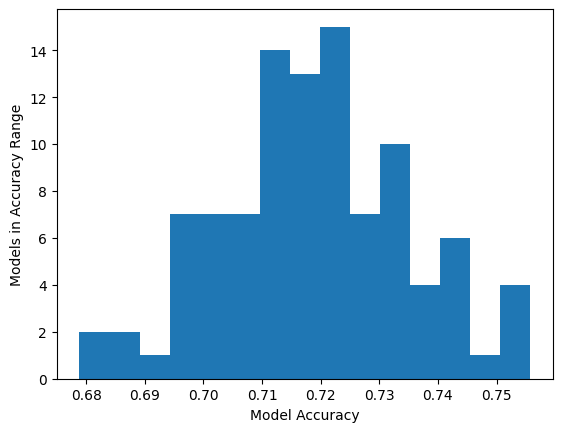

In [ ]:
plt.hist(scores, 15)
plt.xlabel("Model Accuracy")
plt.ylabel("Models in Accuracy Range")
plt.show()

In [ ]:
import scipy.stats as st

st.t.interval(alpha=0.95, df=len(scores)-1, loc=np.mean(scores), scale=st.sem(scores))


<ipython-input-21-f4a047684325>:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(scores)-1, loc=np.mean(scores), scale=st.sem(scores))


(0.7154112649331862, 0.721896427374506)

# Data Results

In [ ]:

y_pred = model.predict(X_train)
count = 0
for i in range(len(y_pred)):
  if np.argmax(y_pred[i]) == np.argmax(y_train[i]):
    count+=1

print(count/len(y_pred))

65/65 [==============================] - 0s 2ms/step
0.7557803468208093


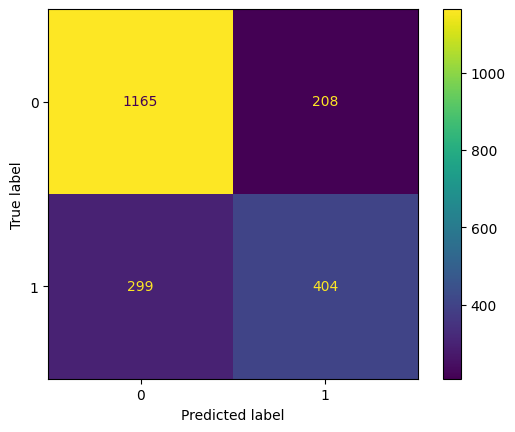

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_pred=np.argmax(y_pred, axis=1), y_true=np.argmax(y_train, axis=1))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:

y_pred = model.predict(X_test)
count = 0
for i in range(len(y_pred)):
  if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
    count+=1

print(count/len(y_pred))

17/17 [==============================] - 0s 2ms/step
0.7653846153846153


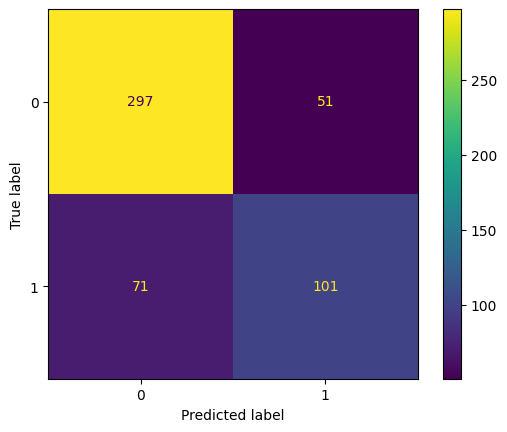

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_pred=np.argmax(y_pred, axis=1), y_true=np.argmax(y_test, axis=1))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

Tests

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Group 3 Inventors Program Project/Data Sets/rodpump_failure.csv')
test_data['FAILURETYPE'] = test_data['FAILURETYPE'].replace(np.nan, 'Not Failure')
test_data['FAILURETYPE'] = test_data['FAILURETYPE'].replace('Tubing', 'Failure')
test_data['FAILURETYPE'] = test_data['FAILURETYPE'].replace('Sucker Rod Pump', 'Failure')
test_data['FAILURETYPE'] = test_data['FAILURETYPE'].replace('Rods', 'Failure')
test_data = test_data.replace(np.nan, 0)
test_data = test_data[filters]



In [ ]:

input_data = []
for i in range(len(test_data)):
  input_data.append(test_data.values[i][1:])

labels = []
for i in range(len(test_data)):
  labels.append(test_data.values[i][0])


labels = np.reshape(np.array(labels), (-1, 1))
oneHotEncoder = OneHotEncoder(sparse=False )
encoded_labels = oneHotEncoder.fit_transform(labels)
encoded_labels

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
input_data = np.array(input_data)
input_data = scaler.transform(input_data)
encoded_labels = np.array(encoded_labels)

X_test, y_test = input_data, encoded_labels

print(X_test.shape,  y_test.shape)

ValueError: ignored

In [ ]:
y_pred = model.predict(X_test)
count = 0
for i in range(len(y_pred)):
  if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
    count+=1

print(count/len(y_pred))

In [ ]:

confusion_matrix = metrics.confusion_matrix(y_pred=np.argmax(y_pred, axis=1), y_true=np.argmax(y_test, axis=1))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
